# Question 6
 plot the evolution of the density parameters for matter, radiation, dark energy and curvature

In [11]:
#for this we have to use camb, so first things first we import it 
import camb
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import G

In [9]:
#now we define the cosmology
H0 = 67.4 
omega_m = 0.315
omega_ch2 = 0.120
omega_bh2 = 0.024
ns = 0.965
tau = 0.054

pars = camb.CAMBparams()
pars.set_cosmology(H0 = H0, ombh2 = omega_bh2, omch2= omega_ch2, tau = tau)

pars.set_dark_energy(w=-1.0)

results = camb.get_results(pars)
results

class: <CAMBdata>
 Params: <CAMBparams>
   WantCls = True
   WantTransfer = False
   WantScalars = True
   WantTensors = False
   WantVectors = False
   WantDerivedParameters = True
   Want_cl_2D_array = True
   Want_CMB = True
   Want_CMB_lensing = True
   DoLensing = True
   NonLinear = NonLinear_none
   Transfer: <TransferParams>
     high_precision = False
     accurate_massive_neutrinos = False
     kmax = 0.9
     k_per_logint = 0
     PK_num_redshifts = 1
     PK_redshifts = [0.0]
   want_zstar = False
   want_zdrag = False
   min_l = 2
   max_l = 2500
   max_l_tensor = 600
   max_eta_k = 6250.0
   max_eta_k_tensor = 1200.0
   ombh2 = 0.024
   omch2 = 0.12
   omk = 0.0
   omnuh2 = 0.000644866570625114
   H0 = 67.4
   TCMB = 2.7255
   YHe = 0.24652689881541084
   num_nu_massless = 2.0293333333333337
   num_nu_massive = 1
   nu_mass_eigenstates = 1
   share_delta_neff = False
   nu_mass_degeneracies = [1.0146666666666666]
   nu_mass_fractions = [1.0]
   nu_mass_numbers = [1]
   In

To calculate the densities we use the following expression 


$ \rho_s(a) = \Omega_s \rho_{cr} a ^ {-3(1-w_s)}$ 

where s is any constituent of the universe 

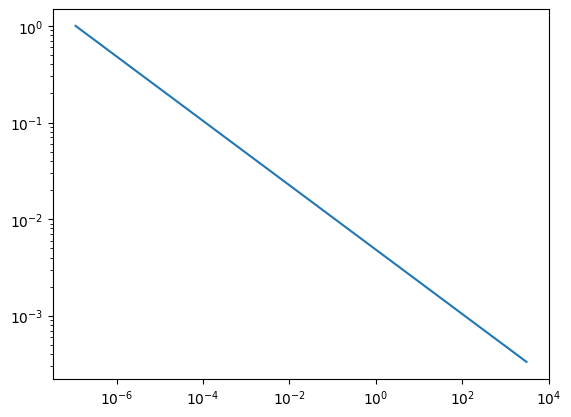

In [17]:
#so now we have to define a 
zmax = 3000.0
Nz = 6000
z = np.linspace(0.0, zmax, Nz)
a = 1.0 / (1.0 + z)

#now we define the density
rho_cr = 3 * H0 ** 2 / 8 * np.pi * G

w = {'m':0, 'r':1/3, 'de':-1, 'k':-1/3}

rho_m = omega_m * rho_cr * a ** (-3 * ((1+w['m'])))


plt.loglog(rho_m, a)